# Análise do índice de suicídio no Brasil - 1985 à 2016

Créditos: [Rodolfo dos Santos](https://rodolfo-santos.com), de São José dos campos - São Paulo.

O estudo a seguir tem como finalidade apresentar,contribuir e ajudar a entender a extensão desse problema no Brasil.

A análise tem como fundamento um conjunto de dados compilados encontrados no link neste [site](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

## Pacotes necessários

In [2]:
from IPython.core.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

_____________________________

## Análise

In [5]:
filename = 'master.csv'
df = pd.read_csv(filename)

In [6]:
print("Linhas x Colunas ", df.shape)
df.head()

Linhas x Colunas  (27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


DataFrame contendo apenas as informações relacionadas ao Brasil.

In [8]:
df_brasil = df[df.country == "Brazil"].copy()
print("Linhas x Colunas: ", df_brasil.shape)
df_brasil.head()

Linhas x Colunas:  (372, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


### Tendência da taxa de suicídio no Brasil

Número de suicídios cometidos no Brasil por 100 mil habitantes, e a tendência do gráfico em relação à taxa mundial.

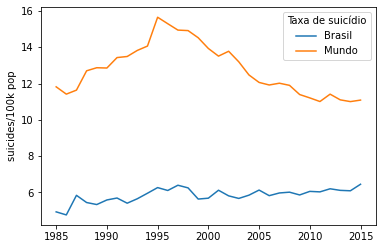

In [17]:
# pegando a media mundial e do Brasil em suicidios
years = df_brasil.year.unique()
suicidios_brasil_media = df_brasil.groupby('year')['suicides/100k pop'].mean()
suicidios_mundo_media = df.groupby('year')['suicides/100k pop'].mean()
suicidios_mundo_media.drop(2016, inplace=True)
ax = sns.lineplot(x=years, y=suicidios_brasil_media, label='Brasil')
ax = sns.lineplot(x=years, y=suicidios_mundo_media, label='Mundo')
plt.legend(title="Taxa de suicídio")
plt.show()

Uma coisa que é facilmente percebida no gráfico acima é que apesar da taxa de suicídios no Brasil ser menor que a média mundial, ela vem crescendo constantemente ao longo de 30 anos.

### Taxa de suicídio entre homens e mulheres

Uma outra análise de grande importância é ver a porcentagem dos suicídios entre homens e mulheres.

Analisando-se todo o período, o dataset utilizado mostrou que aproximadamente 78% dos casos foram cometidos por homens e 22% deles por mulheres. Optou-se por pegar a média dos 30 anos, pois não houve mudança significativa desse comportamento durante o período.

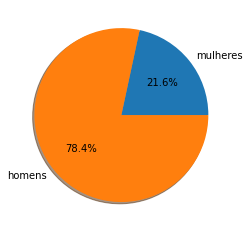

In [15]:
homens_mulheres = df_brasil.groupby('sex').suicides_no.sum() / df_brasil.groupby('sex').suicides_no.sum().sum()
plt.pie(homens_mulheres, labels=['mulheres', 'homens'], autopct='%1.1f%%', shadow=True);

### Faixa etária com maior índice de suícidio

In [14]:
table = pd.pivot_table(df_brasil, values='suicides_no', index=['year'], columns=['age'])
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table = table.reindex(column_order, axis=1)
table.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,38.0,470.5,530.0,653.5,341.5,80.5
1986,31.0,508.0,505.5,651.0,372.0,68.0
1987,33.5,502.0,565.5,724.5,422.0,88.5
1988,30.0,472.0,557.5,724.0,356.0,93.5
1989,31.5,491.5,569.0,692.5,354.5,92.5


Conforme a tabela acima podemos observar que o maior indice de mortalidade está na faixa dos 35-54 anos